# Spark - Transacciones de Ventas en Línea


En este proyecto se utilizará el conjunto de datos de compras en línea, para explorar la segmentación de los clientes con el negocio, dado que el conjunto de datos contiene todas las transacciones ocurridas entre el 2009 y el 2011 para un comercio minorista en línea registrado en el Reino Unido.


En primera instancia se realiza un **Análisis Exploratorio de Datos**, preparándolos para el **algoritmo a priori**, a través de la interesante tarea del método de aprendizaje no supervisado, es decir aplicando el enfoque de minería de **reglas de asociación** para encontrar reglas y patrones interesantes en esta base de datos de transacciones, con el fin de realizar _decisiones interesantes y útiles en lo que respecta al interés del usuario_.

Para la fuente de datos, se recurrió al repositorio Kaggle: https://www.kaggle.com/puneetbhaya/online-retail


### Problema


Se tiene la información de compras en línea de clientes con sus respectivas interacciones con el negocio sin explotar dicha información. En la mayoría de los casos, esta interacción esta en términos de su comportamiento de compra, es decir: la segmentación del cliente a descubrir.


### Objetivo

Explorar las características de los clientes con respecto a sus compras en línea para observar el comportamiento y patrones de compra.

* Realizar a priori un **EDA** para la descripción del conjunto de datos utilizando _**PySpark**_ de la herramienta de _**Spark**_.


* Y finalmente, aplicar **Reglas de Asociación** con la ayuda de la librería _**MLlib**_ de _**Spark**_, para encontrar reglas y patrones de comportamiento.


### Descripción del conjunto de Datos

_Dimensiones:_ 1000000 x 8
&nbsp;

_Formato:_ csv
&nbsp;

_Descripción de las columnas:_
* **InvoiceNo:** código de la compra
* **StockCode:** código del producto
* **Description:** nombre del producto
* **Quantity:** cantidad del producto
* **InvoiceDate:** fecha de la compra
* **UnitPrice:** precio unitario del producto
* **CustomerID:** identificación del cliente
* **Country:** país del cliente

## 1. Carga del conjunto de datos

In [1]:
# iniciando sesion Spark

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("App-Transacciones").getOrCreate()

sc = spark.sparkContext


In [2]:
# cargando el primer dataset

ventas_1 = spark.read.csv( "./../data/Ventas.csv", header=True, mode="DROPMALFORMED", inferSchema=True )

print( type( ventas_1 ) )
ventas_1.printSchema()
ventas_1.show()

# nro. de filas o registros del Dataframe 1

ventas_1.count()


<class 'pyspark.sql.dataframe.DataFrame'>
root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+---------+--------------------+--------+---------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|    InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+---------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|01/12/2009 7:45| 6.95|      13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|01/12/2009 7:45| 6.75|      13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|01/12/2009 7:45| 6.75|      13085|United Kingdom|
| 489434|    22041|"RECORD FRAM

463719

In [3]:
# cargando el segundo dataset

ventas_2 = spark.read.csv( "./../data/Ventas_2.csv", header=True, mode="DROPMALFORMED", inferSchema=True )
ventas_2.printSchema()
ventas_2.show()

# nro. de filas o registros del Dataframe 2

ventas_2.count()


root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|    InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+---------------+---------+----------+--------------+
|   536365|   85123A|WHITE HANGING HEA...|       6|01/12/2010 8:26|     2.55|     17850|United Kingdom|
|   536365|    71053| WHITE METAL LANTERN|       6|01/12/2010 8:26|     3.39|     17850|United Kingdom|
|   536365|   84406B|CREAM CUPID HEART...|       8|01/12/2010 8:26|     2.75|     17850|United Kingdom|
|   536365|   84029G|KNITTED UNION FLA

541909

In [4]:
# llevando a un formato Pandas para una mejor visualización

ventasPD = ventas_2.toPandas()
ventasPD #ventasPD.head(20)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


&nbsp;

### Unión de dos Dataframe's

In [5]:
ventas = ventas_1.union( ventas_2 )

ventas.printSchema()
ventas.show()
ventas.count()


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Customer ID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+---------+--------------------+--------+---------------+-----+-----------+--------------+
|Invoice|StockCode|         Description|Quantity|    InvoiceDate|Price|Customer ID|       Country|
+-------+---------+--------------------+--------+---------------+-----+-----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|01/12/2009 7:45| 6.95|      13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|01/12/2009 7:45| 6.75|      13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|01/12/2009 7:45| 6.75|      13085|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|01/12/2009 7:45|  2.1|  

1005628


## 2. EDA

### Renombrando las columnas

In [6]:
from pyspark.sql.functions import *


In [7]:
renameColumnsDF = ventas.select( col("Invoice"), "StockCode", "Description", "Quantity", "InvoiceDate", "Price", col("Customer ID").alias("CustomerID"), "Country" )

renameColumnsDF.printSchema()
renameColumnsDF.show()


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+---------+--------------------+--------+---------------+-----+----------+--------------+
|Invoice|StockCode|         Description|Quantity|    InvoiceDate|Price|CustomerID|       Country|
+-------+---------+--------------------+--------+---------------+-----+----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|01/12/2009 7:45| 6.95|     13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|01/12/2009 7:45| 6.75|     13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|01/12/2009 7:45| 6.75|     13085|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|01/12/2009 7:45|  2.1|     1308

### Valores Nulos (*null*)

In [8]:
# manipulación de valores nulos (null) en un DATASET

from pyspark.sql.functions import isnan, when, count, col
ventasDF = renameColumnsDF


In [9]:
ventasDF.select( [count(when(isnan(c), c)).alias(c) for c in ventasDF.columns] ).show()

ventasDF.select( [ count(when( isnan(c) | col(c).isNull(), c )).alias(c) for c in ventasDF.columns ] ).show()

ventasDF.count()


+-------+---------+-----------+--------+-----------+-----+----------+-------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|Price|CustomerID|Country|
+-------+---------+-----------+--------+-----------+-----+----------+-------+
|      0|        0|          0|       0|          0|    0|         0|      0|
+-------+---------+-----------+--------+-----------+-----+----------+-------+

+-------+---------+-----------+--------+-----------+-----+----------+-------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|Price|CustomerID|Country|
+-------+---------+-----------+--------+-----------+-----+----------+-------+
|      0|        0|       4230|       0|          0|    0|    226764|      0|
+-------+---------+-----------+--------+-----------+-----+----------+-------+



1005628

In [10]:
# usando una vista temporal para manipular los datos del "dataframe"

ventasDF.createOrReplaceTempView( "ventas" )


#### *Ejemplo:*

In [11]:
# mostrar los precios menores a cero, ademas observando los campos con valores NULOS

preciosMenores = spark.sql( """
    select v.Invoice, v.StockCode, v.Description, v.Quantity, v.InvoiceDate, v.Price, v.CustomerID, v.Country
    from ventas v
    where v.Price <= 0
    order by v.Invoice
""" )

preciosMenores.show()


+-------+---------+-------------------+--------+----------------+-----+----------+--------------+
|Invoice|StockCode|        Description|Quantity|     InvoiceDate|Price|CustomerID|       Country|
+-------+---------+-------------------+--------+----------------+-----+----------+--------------+
| 489463|    71477|              short|    -240|01/12/2009 10:52|  0.0|      null|United Kingdom|
| 489464|    21733|       85123a mixed|     -96|01/12/2009 10:52|  0.0|      null|United Kingdom|
| 489467|   85123A|        21733 mixed|    -192|01/12/2009 10:53|  0.0|      null|United Kingdom|
| 489521|    21646|               null|     -50|01/12/2009 11:44|  0.0|      null|United Kingdom|
| 489655|    20683|               null|     -44|01/12/2009 17:26|  0.0|      null|United Kingdom|
| 489659|    21350|               null|     230|01/12/2009 17:39|  0.0|      null|United Kingdom|
| 489660|    35956|               lost|   -1043|01/12/2009 17:43|  0.0|      null|United Kingdom|
| 489663|   35605A| 

In [12]:
# descartando valores nulos de la columna: "Description" y "CustomerID"

sinNulosDF = spark.sql( """
    select v.Invoice, v.StockCode, v.Description, v.Quantity, v.InvoiceDate, v.Price, v.CustomerID, v.Country
    from ventas v
    where v.Description != '1' and v.CustomerID != 1
""" )

sinNulosDF.select( [ count(when( isnan(c) | col(c).isNull(), c )).alias(c) for c in sinNulosDF.columns ] ).show()

sinNulosDF.printSchema()
sinNulosDF.show()


+-------+---------+-----------+--------+-----------+-----+----------+-------+
|Invoice|StockCode|Description|Quantity|InvoiceDate|Price|CustomerID|Country|
+-------+---------+-----------+--------+-----------+-----+----------+-------+
|      0|        0|          0|       0|          0|    0|         0|      0|
+-------+---------+-----------+--------+-----------+-----+----------+-------+

root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+---------+--------------------+--------+---------------+-----+----------+--------------+
|Invoice|StockCode|         Description|Quantity|    InvoiceDate|Price|CustomerID|       Country|
+-------+---------+--------------------+--------+---------------+-----+----------

In [13]:
# cantidad del "Dataframe" CON valores NULOS

ventasDF.count()


1005628

In [14]:
# cantidad del "Dataframe" SIN valores NULOS

sinNulosDF.count() # 460943 -- solo con los datos de "Description"


778864

### Casteo del tipo de dato

In [15]:
# casteando el tipo de dato de las columnas necesarias

ventasDF = sinNulosDF

casteoDF = ventasDF.select( "Invoice", ventasDF.Invoice.cast('int').alias('InvoiceINT'), "StockCode", "Description", "Quantity", "InvoiceDate", "Price", "CustomerID", "Country" )
casteoDF.printSchema()
casteoDF.show()


root
 |-- Invoice: string (nullable = true)
 |-- InvoiceINT: integer (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+----------+---------+--------------------+--------+---------------+-----+----------+--------------+
|Invoice|InvoiceINT|StockCode|         Description|Quantity|    InvoiceDate|Price|CustomerID|       Country|
+-------+----------+---------+--------------------+--------+---------------+-----+----------+--------------+
| 489434|    489434|    85048|15CM CHRISTMAS GL...|      12|01/12/2009 7:45| 6.95|     13085|United Kingdom|
| 489434|    489434|   79323P|  PINK CHERRY LIGHTS|      12|01/12/2009 7:45| 6.75|     13085|United Kingdom|
| 489434|    489434|   79323W| WHITE CHERRY LIGHTS|      12|01/12/2009 7:45| 6.7

In [16]:
# usando una NUEVA vista temporal para datos del "dataframe"

casteoDF.createOrReplaceTempView( "ventas" )


In [17]:
# casteo de datos String a Date: Ejemplo: -->  TO_DATE(CAST(UNIX_TIMESTAMP(date, 'MM/dd/yyyy') AS TIMESTAMP))

formatoDateDF = spark.sql( """
    select v.Invoice, v.StockCode, v.Description, v.Quantity, TO_DATE( CAST( UNIX_TIMESTAMP( v.InvoiceDate, 'dd/MM/yyyy') AS TIMESTAMP ) ) as Fecha, v.Price, v.CustomerID, v.Country
    from ventas v
""" )

formatoDateDF.printSchema()
formatoDateDF.show()
formatoDateDF.count()


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Fecha: date (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+---------+--------------------+--------+----------+-----+----------+--------------+
|Invoice|StockCode|         Description|Quantity|     Fecha|Price|CustomerID|       Country|
+-------+---------+--------------------+--------+----------+-----+----------+--------------+
| 489434|    85048|15CM CHRISTMAS GL...|      12|2009-12-01| 6.95|     13085|United Kingdom|
| 489434|   79323P|  PINK CHERRY LIGHTS|      12|2009-12-01| 6.75|     13085|United Kingdom|
| 489434|   79323W| WHITE CHERRY LIGHTS|      12|2009-12-01| 6.75|     13085|United Kingdom|
| 489434|    22041|"RECORD FRAME 7""...|      48|2009-12-01|  2.1|     13085|United Kingdom|
| 489434|    21232|STRAWB

778864

### Eliminacion de Filas repetidas

In [18]:
# eliminando filas repetidas, utilizando solo las columnas necesarias

formatoDateDF.createOrReplaceTempView( "ventas" )

filasNoRepetidasDF = spark.sql( """
    select distinct(v.Invoice), v.StockCode
    from ventas v
""" )

filasNoRepetidasDF.printSchema()
filasNoRepetidasDF.show( truncate=False )
filasNoRepetidasDF.count() # 366265  --> con datos de un dataframe


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)

+-------+---------+
|Invoice|StockCode|
+-------+---------+
|489461 |82582    |
|489529 |20773    |
|489529 |21122    |
|489536 |22189    |
|489536 |48179    |
|489557 |16169D   |
|489561 |21816    |
|489567 |48195    |
|489571 |22189    |
|489572 |85028S   |
|489598 |20982    |
|489599 |21239    |
|489617 |46000M   |
|489637 |21796    |
|489637 |48111    |
|489654 |70007    |
|489683 |20913    |
|489766 |21244    |
|489787 |21990    |
|489789 |15056BL  |
+-------+---------+
only showing top 20 rows



757910

In [19]:
757910

757910

#### Ejemplo:

In [20]:
# revisando las filas repetidas: " StockCode = 20971 "

sinNulosDF.createOrReplaceTempView( "ventas" )

filasRepetidasDF = spark.sql( """
    select v.Invoice, v.StockCode, v.Description, v.Quantity, v.InvoiceDate, v.Price, v.CustomerID, v.Country
    from ventas v
    where v.StockCode = 20971
""" )

filasRepetidasDF.printSchema()
filasRepetidasDF.show(100)
filasRepetidasDF.count() # 497214


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+---------+--------------------+--------+----------------+-----+----------+--------------+
|Invoice|StockCode|         Description|Quantity|     InvoiceDate|Price|CustomerID|       Country|
+-------+---------+--------------------+--------+----------------+-----+----------+--------------+
| 489437|    20971|PINK BLUE FELT CR...|      12| 01/12/2009 9:08| 1.25|     15362|United Kingdom|
| 489488|    20971|PINK BLUE FELT CR...|       1|01/12/2009 10:59| 1.25|     17238|United Kingdom|
| 489517|    20971|PINK BLUE FELT CR...|       1|01/12/2009 11:34| 1.25|     16329|United Kingdom|
| 489537|    20971|PINK BLUE FELT CR...|       5|01/12/2009 12:14| 1.25|  

995

In [22]:
# creando una vista temporal 

formatoDateDF.createOrReplaceTempView( "ventas" )

data = spark.sql( """
    select distinct(v.Invoice), v.StockCode, v.Description, v.Quantity, v.Fecha, v.Price, v.CustomerID, v.Country
    from ventas v
""" )

data.printSchema()
data.show()
data.count()

root
 |-- Invoice: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Fecha: date (nullable = true)
 |-- Price: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)

+-------+---------+--------------------+--------+----------+-----+----------+--------------+
|Invoice|StockCode|         Description|Quantity|     Fecha|Price|CustomerID|       Country|
+-------+---------+--------------------+--------+----------+-----+----------+--------------+
| 489461|    72756|  FAIRY CAKE CANDLES|      27|2009-12-01| 1.49|     17865|United Kingdom|
| 489529|    22030|SWALLOWS GREETING...|       1|2009-12-01| 0.42|     17984|United Kingdom|
| 489529|    21866|UNION JACK FLAG L...|       1|2009-12-01| 1.25|     17984|United Kingdom|
| 489564|    90088|CRYSTAL KEY+LOCK ...|      24|2009-12-01| 0.85|     13526|United Kingdom|
| 489580|    21975|PACK O

767868

In [23]:
# agrupando los productos diferentes, y realizando el conteo de frecuencias

productos = spark.sql( """
    select *
    from (  select v.Description, count(*) as cantidad
            from ventas v
            group by v.Description) a
    order by a.cantidad desc limit 50
""" )

productos.printSchema()
productos.show( truncate=False )
productos.count()


root
 |-- Description: string (nullable = true)
 |-- cantidad: long (nullable = false)

+----------------------------------+--------+
|Description                       |cantidad|
+----------------------------------+--------+
|WHITE HANGING HEART T-LIGHT HOLDER|4990    |
|REGENCY CAKESTAND 3 TIER          |3561    |
|ASSORTED COLOUR BIRD ORNAMENT     |2617    |
|JUMBO BAG RED RETROSPOT           |2592    |
|PARTY BUNTING                     |2099    |
|LUNCH BAG  BLACK SKULL.           |2073    |
|STRAWBERRY CERAMIC TRINKET BOX    |1999    |
|BAKING SET 9 PIECE RETROSPOT      |1969    |
|REX CASH+CARRY JUMBO SHOPPER      |1969    |
|POSTAGE                           |1920    |
|LUNCH BAG SPACEBOY DESIGN         |1889    |
|LUNCH BAG CARS BLUE               |1835    |
|HOME BUILDING BLOCK WORD          |1830    |
|60 TEATIME FAIRY CAKE CASES       |1823    |
|WOODEN FRAME ANTIQUE WHITE        |1780    |
|HEART OF WICKER SMALL             |1754    |
|HEART OF WICKER LARGE             |17

50

In [24]:
# la venta minima y maxima de los productos

productos.select("cantidad").agg( {"cantidad": "max"} ).show()
productos.select("cantidad").agg( {"cantidad": "min"} ).show()
# productos.select("Price").agg( {"Price": "avg"} ).show()


+-------------+
|max(cantidad)|
+-------------+
|         4990|
+-------------+

+-------------+
|min(cantidad)|
+-------------+
|         1175|
+-------------+



### Gráficos

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

dataPD = productos.toPandas()
dataPD.head()

,Description,cantidad
0,WHITE HANGING HEART T-LIGHT HOLDER,4990
1,REGENCY CAKESTAND 3 TIER,3561
2,ASSORTED COLOUR BIRD ORNAMENT,2617
3,JUMBO BAG RED RETROSPOT,2592
4,PARTY BUNTING,2099


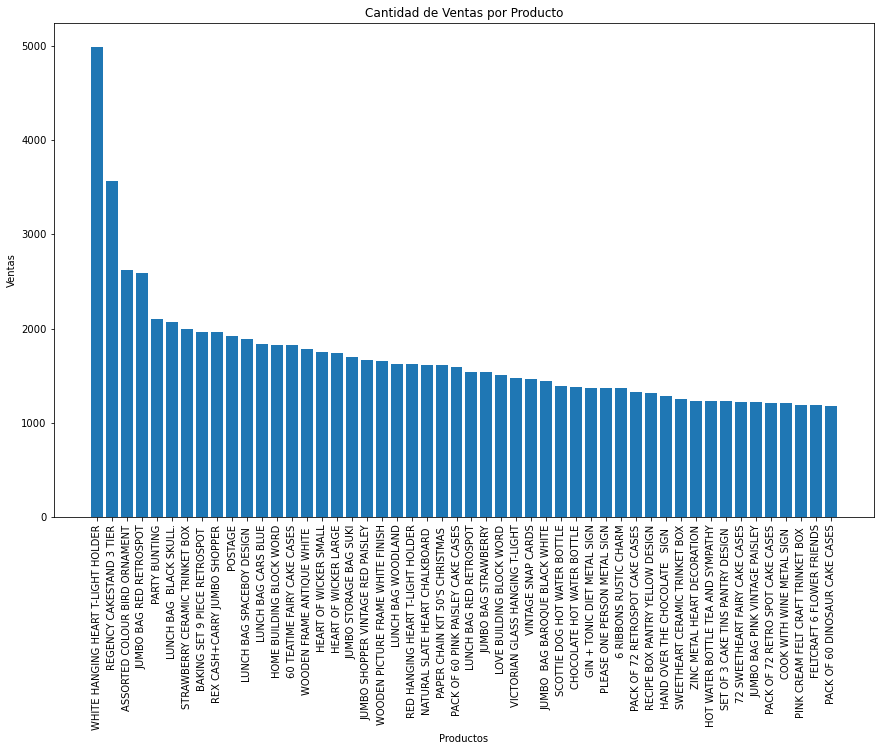

In [26]:

fig = plt.figure( figsize=(50,20) )
plt.subplot2grid( (2,3), (0,0) )

plt.title( 'Cantidad de Ventas por Producto' )
plt.xlabel( 'Productos' )
plt.ylabel( 'Ventas' )

# creamos la grafica de barras utilizando 'Productos' como eje 'x' y 'Cantidad vendida' como eje 'y'.
plt.bar( dataPD.Description, dataPD.cantidad )

plt.xticks(rotation='vertical')

# finalmente mostramos la grafica con el metodo show()
plt.show()


### Preparación de los datos

In [27]:
# mostrar los valores distintos de la columna "Description"

ventasDF = filasNoRepetidasDF

ventasDF.select("StockCode").distinct().show( truncate=False )
ventasDF.select("StockCode").distinct().count()


+---------+
|StockCode|
+---------+
|21259    |
|21248    |
|21894    |
|21249    |
|21452    |
|22596    |
|22121    |
|22728    |
|21889    |
|22254    |
|23318    |
|23459    |
|20868    |
|90143    |
|21331    |
|84899F   |
|90210B   |
|84881    |
|90026D   |
|90022    |
+---------+
only showing top 20 rows



4644

In [28]:
# agrupación por producto a la vez haciendo un conteo, metodo 1: vista temporal

ventasDF.createOrReplaceTempView( "miVenta" )

df = spark.sql( """
    select *
    from (  select v.StockCode, count(*) as cantidad
            from miVenta v
            group by v.StockCode) a
    order by a.cantidad desc
""" )
df.show( truncate=False )
df.count()


+---------+--------+
|StockCode|cantidad|
+---------+--------+
|85123A   |4826    |
|22423    |3526    |
|85099B   |3214    |
|20725    |2590    |
|84879    |2559    |
|21212    |2446    |
|47566    |2068    |
|21232    |2002    |
|20727    |1984    |
|22383    |1971    |
|22138    |1945    |
|POST     |1918    |
|22382    |1892    |
|22384    |1832    |
|20914    |1815    |
|22139    |1798    |
|20728    |1790    |
|21754    |1773    |
|22197    |1762    |
|21034    |1753    |
+---------+--------+
only showing top 20 rows



4644

In [29]:
# agrupación por producto a la vez haciendo un conteo, metodo 2: funcion sql agregado

df = ventasDF.groupBy("StockCode").count()#.orderBy("count")
df.show( truncate=False )
df.count()
# df.orderBy("count").show()


+---------+-----+
|StockCode|count|
+---------+-----+
|21259    |543  |
|21248    |127  |
|21894    |147  |
|21249    |188  |
|21452    |329  |
|22596    |410  |
|22121    |358  |
|22728    |756  |
|21889    |847  |
|22254    |114  |
|23318    |336  |
|23459    |21   |
|20868    |44   |
|90143    |20   |
|21331    |24   |
|84899F   |23   |
|90210B   |14   |
|84881    |20   |
|90026D   |8    |
|90022    |5    |
+---------+-----+
only showing top 20 rows



4644


### Preparación de los datos para el análisis del algoritmo APRIORI (Reglas de Asociación)


In [30]:
# convirtiendo la columna "Description" del tipo de dato String a "Array de String's"

import pyspark.sql.functions as F
import pyspark.sql.types as T


### Funciones UDF

In [31]:
# funcion UDF: para convertir un String a Array

def String_to_Array( x ):
    
    res = []
    # res.append( x )
    for x_ in x:
        res.append( x_.lower() )
    return res

convert_to_Array = F.udf( String_to_Array, T.ArrayType( T.StringType() ) )


In [32]:
# ejecutando la funcion UDF

elNuevoDF = ventasDF.withColumn( "StockCode", convert_to_Array( F.array( F.col("StockCode") ) ) ).select( "Invoice", "StockCode" )
elNuevoDF.printSchema()
elNuevoDF.show( truncate=False )
elNuevoDF.count() # 366265


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: array (nullable = true)
 |    |-- element: string (containsNull = true)

+-------+---------+
|Invoice|StockCode|
+-------+---------+
|489461 |[82582]  |
|489529 |[20773]  |
|489529 |[21122]  |
|489536 |[22189]  |
|489536 |[48179]  |
|489557 |[16169d] |
|489561 |[21816]  |
|489567 |[48195]  |
|489571 |[22189]  |
|489572 |[85028s] |
|489598 |[20982]  |
|489599 |[21239]  |
|489617 |[46000m] |
|489637 |[21796]  |
|489637 |[48111]  |
|489654 |[70007]  |
|489683 |[20913]  |
|489766 |[21244]  |
|489787 |[21990]  |
|489789 |[15056bl]|
+-------+---------+
only showing top 20 rows



757910

In [33]:
# agrupando por CODIGO DE FACTURA, para tener una LISTA de productos

ventasDF = elNuevoDF.rdd.map(lambda r: (r.Invoice, r.StockCode)).reduceByKey(lambda x,y: x + y).toDF(['Invoice','StockCode'])
ventasDF.printSchema()
ventasDF.show(truncate=False)


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: array (nullable = true)
 |    |-- element: string (containsNull = true)

+-------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Invoice|StockCode                                                                                                                                                                                                                            

In [34]:
# visualizacion en formato "pandas"

ventasDF.toPandas()


,Invoice,StockCode
0,498929,"[21485, 21484, 21624, 84970s, 22287, 21622, 22..."
1,499768,"[84536a, 21034, 21294, 22075, 85049a, 21488, 4..."
2,501651,"[22343, 21899, 22346, 22411, 85194s, 21985, 22..."
3,503877,"[20702, 22528, 48194, 22189, 22523, 22520, 225..."
4,508652,"[22644, 85049e, 22147, 47568, 20702, 20703, 21..."
...,...,...
43268,508631,"[22409, 21429]"
43269,515036,"[84536a, 20973]"
43270,C531428,[22727]
43271,C575585,[21259]


In [35]:
# haciendo pruebas con mini dataset: de distintas cantidades

ventasDF_1 = ventasDF

ventasDF.createOrReplaceTempView("miniVenta")

miniGrupo = spark.sql( """
    select v.Invoice, v.StockCode
    from miniVenta v
""" ) # limit 10000

miniGrupo.printSchema()
miniGrupo.show()
miniGrupo.count()

ventasDF_1 = miniGrupo


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: array (nullable = true)
 |    |-- element: string (containsNull = true)

+-------+--------------------+
|Invoice|           StockCode|
+-------+--------------------+
| 498929|[21485, 21484, 21...|
| 499768|[84536a, 21034, 2...|
| 501651|[22343, 21899, 22...|
| 503877|[20702, 22528, 48...|
| 508652|[22644, 85049e, 2...|
| 514134|[21171, 22412, 82...|
| 515595|[82486, 47599b, 2...|
| 522463|[22158, 21383, 85...|
| 522797|[21788, 21677, 51...|
| 524201|[22554, 22659, 22...|
| 528166|[22457, 84929, 22...|
| 528356|[21901, 22553, 21...|
| 565129|[22980, 22385, 23...|
| 570791|[22944, 84944, 85...|
| 581352|[22723, 22675, 23...|
| 489573|[22071, 22295, 22...|
| 490834|[21154, 37502, 84...|
| 492168|[21622, 21158, 21...|
| 493183|[20750, 84997a, 2...|
| 498555|[21624, 20615, 21...|
+-------+--------------------+
only showing top 20 rows



### 3. REGLAS DE ASOCIACIÓN:


In [36]:
# importando el algoritmo de Reglas de Asociación: crecimiento de patrones frecuentes

from pyspark.ml.fpm import FPGrowth


In [37]:
ventasDF_1.printSchema()
ventasDF_1.show() #ventasDF_1.show(truncate=False)
ventasDF_1.count()


root
 |-- Invoice: string (nullable = true)
 |-- StockCode: array (nullable = true)
 |    |-- element: string (containsNull = true)

+-------+--------------------+
|Invoice|           StockCode|
+-------+--------------------+
| 498929|[21485, 21484, 21...|
| 499768|[84536a, 21034, 2...|
| 501651|[22343, 21899, 22...|
| 503877|[20702, 22528, 48...|
| 508652|[22644, 85049e, 2...|
| 514134|[21171, 22412, 82...|
| 515595|[82486, 47599b, 2...|
| 522463|[22158, 21383, 85...|
| 522797|[21788, 21677, 51...|
| 524201|[22554, 22659, 22...|
| 528166|[22457, 84929, 22...|
| 528356|[21901, 22553, 21...|
| 565129|[22980, 22385, 23...|
| 570791|[22944, 84944, 85...|
| 581352|[22723, 22675, 23...|
| 489573|[22071, 22295, 22...|
| 490834|[21154, 37502, 84...|
| 492168|[21622, 21158, 21...|
| 493183|[20750, 84997a, 2...|
| 498555|[21624, 20615, 21...|
+-------+--------------------+
only showing top 20 rows



43273

In [38]:
# entrenando al modelo

fpGrowth = FPGrowth( itemsCol="StockCode", minSupport=0.01, minConfidence=0.1 ) # 0.5  0.6 ---  0.4  0.6  ---  0.2   0.7
modelo = fpGrowth.fit( ventasDF_1 )


In [39]:
# muestra conjuntos de elementos frecuentes

modelo.freqItemsets.show(truncate=False)


+----------------+----+
|items           |freq|
+----------------+----+
|[48185]         |724 |
|[22729]         |486 |
|[85123a]        |4826|
|[22423]         |3526|
|[22423, 85123a] |483 |
|[21122]         |722 |
|[22634]         |485 |
|[85099b]        |3214|
|[85099b, 85123a]|574 |
|[20676]         |714 |
|[22623]         |484 |
|[22055]         |483 |
|[20725]         |2590|
|[20725, 85099b] |826 |
|[20725, 85123a] |512 |
|[20749]         |710 |
|[84879]         |2559|
|[84879, 85123a] |627 |
|[21985]         |710 |
|[20973]         |483 |
+----------------+----+
only showing top 20 rows



In [40]:
# muestra las reglas de asociación generadas

modelo.associationRules.show()


+---------------+----------+-------------------+------------------+
|     antecedent|consequent|         confidence|              lift|
+---------------+----------+-------------------+------------------+
|        [22554]|   [22556]|0.44197292069632493|18.162862485557522|
|        [22554]|   [22551]| 0.5077369439071566|19.722891179258877|
| [20726, 22382]|   [20725]| 0.6307053941908713|10.537650394911806|
|[22386, 85099b]|   [21931]| 0.4172248803827751|10.798189144021428|
|[22386, 85099b]|  [85099f]|0.45550239234449763|13.019124850675988|
|        [21977]|   [21212]|  0.536222509702458| 9.486490867683756|
|        [21977]|   [84991]|0.46959896507115134|11.678710353749386|
|        [21977]|   [84992]| 0.2943078913324709|11.113076249240848|
|        [21977]|   [21975]| 0.3078913324708926| 11.99224269128077|
|        [22699]|   [22423]| 0.5331491712707183|  6.54309815326086|
|        [22699]|   [22697]| 0.6832412523020258| 30.60652040462274|
|        [22699]|   [22698]|  0.574585635359116|

In [41]:
# creando una lista de productos, para la prueba de las prediciones

nuevosDatos = spark.createDataFrame( [ ( [ "85123A", "22423", "85099B", "20725" ], ) ], [ "StockCode" ] )
nuevosDatos.printSchema()
nuevosDatos.show( truncate=False )

# [ "85123a", "22423", "85099b", "20725" ]


root
 |-- StockCode: array (nullable = true)
 |    |-- element: string (containsNull = true)

+------------------------------+
|StockCode                     |
+------------------------------+
|[85123A, 22423, 85099B, 20725]|
+------------------------------+



In [42]:
# mostrando las primeras predicciones, dado una lista de productos

sorted( modelo.transform( nuevosDatos ).first().prediction ) #['x', 'y', 'z']


['20724',
 '20726',
 '20727',
 '20728',
 '21212',
 '21931',
 '22382',
 '22383',
 '22384',
 '22386',
 '22697',
 '22698',
 '22699',
 '85099b',
 '85123a']

In [43]:
sinNulosDF.createOrReplaceTempView( "prueba" )

data = spark.sql( """
    select distinct(v.StockCode), v.Description
    from prueba v
    where v.StockCode IN ( '20724',
 '20726',
 '20727',
 '20728',
 '21212',
 '21931',
 '22382',
 '22383',
 '22384',
 '22386',
 '22697',
 '22698',
 '22699',
 '85099b',
 '85123a' )
""" )

#data.printSchema()
data.show(truncate=False)
#data.count()


+---------+--------------------------------+
|StockCode|Description                     |
+---------+--------------------------------+
|21931    |JUMBO STORAGE BAG SUKI          |
|22386    |JUMBO BAG PINK POLKADOT         |
|22384    |LUNCH BAG PINK POLKADOTS        |
|22386    |JUMBO BAG PINK WITH WHITE SPOTS |
|22697    |TEACUP AND SAUCER REGENCY GREEN |
|21212    |PACK OF 72 RETRO SPOT CAKE CASES|
|20724    |RED SPOTTY CHARLOTTE BAG        |
|22383    |LUNCH BAG SUKI  DESIGN          |
|20727    |LUNCH BAG  BLACK SKULL.         |
|22382    |LUNCH BAG SPACEBOY DESIGN       |
|22383    |LUNCHBAG SUKI  DESIGN           |
|22384    |LUNCH BAG PINK POLKADOT         |
|22384    |LUNCH BAG PINK RETROSPOT        |
|21212    |PACK OF 72 RETROSPOT CAKE CASES |
|22697    |GREEN REGENCY TEACUP AND SAUCER |
|20724    |RED RETROSPOT CHARLOTTE BAG     |
|20726    |LUNCH BAG WOODLAND              |
|22698    |PINK REGENCY TEACUP AND SAUCER  |
|20728    |LUNCH BAG CARS BLUE             |
|22383    

In [44]:
# observando las predicciones del mismo dataset

modelo.transform( ventasDF ).show()


+-------+--------------------+--------------------+
|Invoice|           StockCode|          prediction|
+-------+--------------------+--------------------+
| 498929|[21485, 21484, 21...|     [22111, 84970l]|
| 499768|[84536a, 21034, 2...|     [85123a, 22112]|
| 501651|[22343, 21899, 22...|[22355, 20724, 22...|
| 503877|[20702, 22528, 48...|[85099b, 22384, 2...|
| 508652|[22644, 85049e, 2...|[85123a, 21212, 2...|
| 514134|[21171, 22412, 82...|[21181, 21175, 85...|
| 515595|[82486, 47599b, 2...|[22355, 22356, 22...|
| 522463|[22158, 21383, 85...|                  []|
| 522797|[21788, 21677, 51...|[22355, 20724, 20...|
| 524201|[22554, 22659, 22...|[22556, 22629, 22...|
| 528166|[22457, 84929, 22...|[22139, 22617, 85...|
| 528356|[21901, 22553, 21...|[85099b, 21931, 2...|
| 565129|[22980, 22385, 23...|[22356, 21929, 20...|
| 570791|[22944, 84944, 85...|[85123a, 20725, 2...|
| 581352|[22723, 22675, 23...|[22139, 22617, 22...|
| 489573|[22071, 22295, 22...|[22617, 84997d, 8...|
| 490834|[21

### Conclusión

Al realizar un Análisis Exploratorio de Datos (EDA) sobre un conjunto de datos (transacciones de ventas en línea) se pudo observar valores interesantes, tales como: nulos, negativos, formatos de campos incorrectos, filas o registros duplicadas y entre otros; y consecuentemente preparando los datos y realizando algunas gráficas como ayuda para el análisis.
&nbsp;

Y finalmente se realizó un modelo, aplicando el algoritmo a priori (reglas de asociación) para detectar patrones y comportamientos de compras por parte de los clientes; dado el caso del modelo, no funcionó del todo encontrar comportamientos o patrones de compra de los productos, ya que existe frecuencias menores de compras, es decir: aún no se puede concretar una buena toma de decisiones.

### Recomendaciones

Para tener resultados óptimos en el análisis exploratorio de datos y un modelo de comportamientos de compras frecuentes, se aconseja tomar en cuenta los siguientes puntos:

* Manipular las columnas con datos numéricos NEGATIVOS.
* Analizar los registros de ID de clientes registrados como NULOS.
* Al realizar CASTEO se pierden datos (se vuelven datos nulos): de String a Number.
* Agrupar las compras por: fecha (día) y cliente para un mejor entendimiento.
* Validar únicos ID's, tanto para "StockCode y Description".

In [45]:

## FIN DEL PROYECTO


In [64]:
# convirtiendo el archivo a formato parquet

ventasDF_1.write.parquet("./../data/ventasParquet")
